# Twitter sentimental analysis

In [60]:
## importing laibaries 
import pandas as pd 
import numpy as np

In [61]:
## loading the dataset
df=pd.read_csv('Elon_musk.csv',encoding = "latin-1")

In [62]:
df.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


### Thereare lots of pancuations in tweet so we need to drop it!

In [63]:
# import packages
import numpy as np
import re

# function to remove user handles
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt  

# remove user handles
df['clean_text'] = df['Text'].apply(lambda row:remove_pattern(row, "@[\w]*"))


# first five observations
df.head(10)

,Unnamed: 0,Text,clean_text
0,1,@kunalb11 Im an alien,Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,Ray tracing on Cyberpunk with HDR is next-lev...
2,3,@joerogan @Spotify Great interview!,Great interview!
3,4,@gtera27 Doge is underestimated,Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...,Congratulations Tesla China for amazing execu...
5,6,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,Happy New Year of the Ox! https://t.co/9WFKMYu2oj
6,7,"Frodo was the underdoge,\nAll thought he would...","Frodo was the underdoge,\nAll thought he would..."
7,8,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),Haha thanks :)
8,9,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,Indeed! Tweets definitely do not represent r...
9,10,The most entertaining outcome is the most likely,The most entertaining outcome is the most likely


## From above all panctuations are removed.

In [64]:
## checking shape of the data
df.shape

(1999, 3)

## There may be some stopwards in the data so we need to drop it & also converting text into numbers using steaming.

In [6]:
!pip install nltk

In [19]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Aniket
[nltk_data]     Mali\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Aniket
[nltk_data]     Mali\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [65]:
from nltk.corpus import stopwords
import nltk
from string import punctuation
from nltk.stem.porter import *

In [66]:
stop_words = list(set(stopwords.words('english')))+list(punctuation)

# tokenize
df['tokenized_text'] = [nltk.word_tokenize(x) for x in df['clean_text']]

# stopword removal
df['tokenized_text'] = df['tokenized_text'].apply(lambda row: [word for word in row if word not in stop_words])

# stemming words
stemmer = PorterStemmer()
df['tokenized_text'] = df['tokenized_text'].apply(lambda x: [stemmer.stem(i) for i in x])
df['tokenized_text'] = df['tokenized_text'].apply(lambda x: ' '.join(x))
df.head()

,Unnamed: 0,Text,clean_text,tokenized_text
0,1,@kunalb11 Im an alien,Im an alien,im alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,Ray tracing on Cyberpunk with HDR is next-lev...,ray trace cyberpunk hdr next-level have tri
2,3,@joerogan @Spotify Great interview!,Great interview!,great interview
3,4,@gtera27 Doge is underestimated,Doge is underestimated,doge underestim
4,5,@teslacn Congratulations Tesla China for amazi...,Congratulations Tesla China for amazing execu...,congratul tesla china amaz execut last year no...


## all stopwards are removes as they are not useful.

# sentimental analysis using vader sentiment!

In [28]:
!pip install vaderSentiment

In [67]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [68]:
# function to print sentiments
# of the sentence.
def sentiment_scores(sentence):
 
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
 
    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)
     
    print("Overall sentiment dictionary is : ", sentiment_dict)
    print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
    print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
    # function to print sentiments
# of the sentence.
def sentiment_scores(sentence):
 
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
 
    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)
     
    print("Overall sentiment dictionary is : ", sentiment_dict)
    print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
    print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")      

In [69]:
Review1=df.iloc[5:8,3:]

In [70]:
sentiment_scores(Review1)

Overall sentiment dictionary is :  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
sentence was rated as  0.0 % Negative
sentence was rated as  100.0 % Neutral


In [71]:
df['tokenized_text'] = df['tokenized_text'].astype(str)

In [72]:
df_1=df['tokenized_text'] 

In [73]:
sentiment_scores(df_1)

Overall sentiment dictionary is :  {'neg': 0.043, 'neu': 0.823, 'pos': 0.134, 'compound': 1.0}
sentence was rated as  4.3 % Negative
sentence was rated as  82.3 % Neutral


In [74]:
data={'negative':0.043,'neutral':0.823,'positive':0.134}

In [75]:
df2=pd.DataFrame(data,index=[0])
df2

,negative,neutral,positive
0,0.043,0.823,0.134


In [76]:
a=['negative','neutral','positive']
b=[0.043,0.823,0.134]

In [92]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x26d5abccb80>,
 [Text(1.0899783593649226, 0.1481457934473737, 'negative'),
  Text(-1.0553537353620035, 0.31020717795928965, 'neutral'),
  Text(1.003960794038326, -0.44951387524072534, 'positive')])

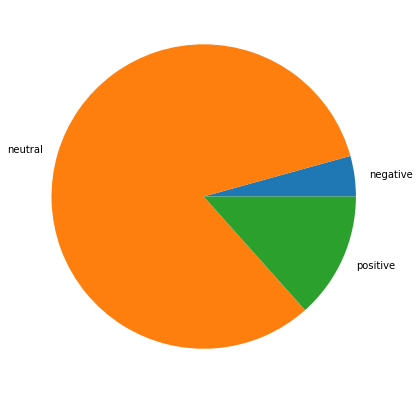

In [93]:
fig = plt.figure(figsize =(10, 7))
plt.pie(b, labels = a)

# Conclusion.

## Elon musk tweets are genrally neutral!